<center><div style="font-size: 40px"> <b>COVID-19 and the 2020 Election</b> </center>
<br><br><br>
<center><div style="font-size: 30px"> <b>by Naga Nageswaran, Daniel Gao, and Matt Frohman</b> </center>

<br><br><br><br>

<center><div style="font-size: 30px"> <b>Overview</b> </center>
In this tutorial, we aim to introduce you to the data science process by analyzing the 2020 Presidential Election. There are several steps to the data science pipeline: data collection, data processing, exploratory anaylsis/visualization, and hypothesis testing.  The introduction will give you a brief overview of the data we will try to analyze as well as the motive in studying it.  Each subsequent section of this tutorial will walk the user through one of the key steps of data science.  All code is written in the Jupyter Notebook using Python.  
<br><br><br><br>

<center><div style="font-size: 30px"> <b>Introduction</b> </center>
The U.S. recently underwent a presidential election for the year of 2020. In one of the most highly contested and controversial elections of the nation, Joe Biden, the former Vice President under Barack Obama, defeated the incumbent president, Donald Trump. The election was surrounded in controversy, both in terms of the candidates who ran and the election outcome.

Our group chose to analyze data regarding voter turnout rates for the 2020 Presidential Election, and learn a little bit more about what happened in this election. Voter turnout is the percentage of eligible voters who cast a ballot in an election. Eligibility varies by country, and the voting-eligible population should not be confused with the total adult population. Age and citizenship status are often among the criteria used to determine eligibility, but some countries further restrict eligibility based on sex, race, or religion.

The right to vote is one of our hallmark rights, and every U.S. citizen should exercise this right. Our aim in analyzing this data is to share with our viewers a more comprehensive, analytical viewpoint of who voted this election. We hope to shed some light on what went right and wrong this election, and potentially expose some avenues on how we can make it easier to vote throughout the nation. 

The election of 2020 also presented circumstances unforeseen in our nation’s history. The Coronavirus pandemic, unlike anything seen before, the  has been ongoing for several months before the election. The pandemic has had unforeseen consequences in our society, such as introducing new social precautions and the preventing of most forms of public gatherings. Due to how widespread the pandemic has affected society, it can be argued that it has had an effect on voting on states most significantly impacted by it. We will seek to explore how the pandemic has affected voting in states most affected, and we hypothesize that states most affected by the pandemic will have had fewer votes than others. 

We will obtain both our election dataset and covid dataset from the website kaggle.com, the famous data science and machine learning hub, and it was provided via data.world by the government. 

<br><br><br><br>



<center><div style="font-size: 30px"> <b>Data Collection</b> </center>

The first thing we need to do is obtain the election data at https://www.kaggle.com/imoore/2020-us-general-election-turnout-rates?select=2020+November+General+Election+-+Turnout+Rates.csv.  We then read them into a dataframe using pandas, which allows us to perform operations on the rows and columns of data. 

In [1]:
## data collection
import pandas as pd 
import numpy as np

data = pd.read_csv('election_data.csv')
data.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


For our coronavirus data, we obtained that data from https://www.kaggle.com/etsc9287/2020-general-election-polls, the data turns into a massive table with hundreds of counties and many different column indicators such as if the person has a child or not for example. We will later operate on this data to accumulate and curate the values we need. It is important to distinguish that this data, in relation to coronavirus, is up until November 1st, one of the most anticipated polling days pre-election. 

In [2]:
electional = pd.read_csv('county_statistics.csv')
electional.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Data Processing</b> </center>

For the data processing step, we tailored the pandas data object to only show what we needed. However, with a table that consists of hundreds of different indicators and values, there will need to be some additional steps. In our COVID table, there were many NaN values, as some counties had failed to report some of their information sometimes (such as coronavirus cases). We replaced all NaN values with 0. We then replaced all of the whole numbers of the graphs, such as votes counted (this cannot be a decimal because that wouldn't make sense) as ints, after string processing them. We then only included the values we needed for the turnout table, which was the Total Ballots Counted, Voting Elligible Population (VEP),Voting Age Population (VAP), and % citizen. Now for the somewhat complicated part, since the covid data was demographical, it came by each individual counties. For processing this data, we identified what state each county was in, and made separate dataframe objects containing the counties for each state. We then need to merge all the counties together, which we did by using the sum function, into one row of data for that specific state. Now the final step was to merge the two respective tables into one coherent table, which can be done easily using pandas merge, however, it needs one column indicator in common between the two graphs. So we used state abbreviationa as a common indicator, which required us to add that column by combing through each state and inserting the value of its State Abbreviation in the Covid table. After replacing the column names with some more presentable names such as "Trump Votes" instead of "trump_20_votes," our table is finally ready. Our table contains Trump's and Biden's votes, the VEP and VAP rates, Coronavirus cases and deaths, the ratio of citizens to non-citizens, and State/Region indicators (based on the National Geographic United States regional index).

In [3]:
#code for data processing
#deleting columns with NaN values

del data['Source']
del data['Official/Unofficial']
del data['Vote for Highest Office (President)']
del data['Overseas Eligible']

numbers = ['Total Ballots Counted (Estimate)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','Prison', 'Probation', 'Parole', 'Total Ineligible Felon']

floaters = ['VEP Turnout Rate', '% Non-citizen']

#converting strings into proper number format
for c in numbers:
    data[c] = data[c].str.replace(',','')

for c in floaters:
    data[c] = data[c].str.replace('%','')

data[numbers] = data[numbers].astype('int')
data[floaters] = data[floaters].astype('float')

#creating a column for % citizen
data['% Citizen'] = 100 - data['% Non-citizen']

#regional column
west = ['Wyoming','Hawaii','Alaska','California','Nevada','Utah','Colorado','Washington','Oregon','Montana','Idaho']

midwest = ['North Dakota','Minnesota','South Dakota','Wisconsin','Iowa','Illinois','Nebraska','Kansas','Missouri','Ohio','Indiana','Michigan']

northeast = ['Maine','New York','New Jersey','New Hampshire','Massachusetts','Vermont','Rhode Island', 'Connecticut','Pennsylvania']

southeast = ['Maryland','District of Columbia','Delaware','West Virginia','Virginia','Kentucky','Tennessee','North Carolina','South Carolina','Georgia','Alabama','Louisiana','Arkansas','Mississippi','Florida']

southwest = ['Oklahoma','New Mexico','Arizona','Texas']

data['Region'] = data.State.apply(lambda x:
    'W' if x in west else ('MW' if x in midwest else ('NE' if x in northeast else ('SE' if x in southeast else( 'SW' if x in southwest else '--')))) ) 


#reordering columns
data = data[['State','Region','State Abv','Total Ballots Counted (Estimate)', 'VEP Turnout Rate','Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','% Citizen','% Non-citizen','Prison', 'Probation', 'Parole', 'Total Ineligible Felon']]

def replacer(x):
    return x.fillna(0)

electional = electional[['state','percentage20_Donald_Trump',
'percentage20_Joe_Biden','total_votes20','votes20_Donald_Trump','votes20_Joe_Biden','cases','deaths',]]

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states_holder = []
d = electional.loc[electional['state'] == 'SC']
for s in states:
    d = electional.loc[electional['state'] == s]
    d = pd.DataFrame(d)
    states_holder.append(d)

for i in range(50):
    states_holder[i] = replacer(states_holder[i])    
    states_holder[i] = states_holder[i].groupby(['state'], as_index = False).sum()
    states_holder[i] = states_holder[i].rename(columns = {'state' : 'State Abv'})

electional = pd.concat(states_holder)

del electional['state']

final_data = pd.merge(electional, data, on = 'State Abv', how = 'left').dropna()
final_data = final_data.rename(columns = {'total_votes20' : 'Total votes',
'votes20_Donald_Trump' : 'Trump Votes', 'votes20_Joe_Biden' : 'Biden Votes'})

election_nums = ['Trump Votes', 'Biden Votes','cases','deaths']
final_data[election_nums] = final_data[election_nums].astype('int')

final_data = final_data[['State','Region','Trump Votes','Biden Votes','cases','deaths','Total Ballots Counted (Estimate)', 'VEP Turnout Rate','Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','% Citizen','% Non-citizen']]

final_data['Covid Cases to Population Ratio'] = (final_data['cases'] / final_data['Voting-Age Population (VAP)']) * 100

final_data

,State,Region,Trump Votes,Biden Votes,cases,deaths,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Citizen,% Non-citizen,Covid Cases to Population Ratio
0,Alabama,SE,1434159,843473,193985,2973,2306587,62.6,3683055,3837540,97.7,2.3,5.054931
1,Alaska,W,148624,102080,16705,83,367000,69.8,525568,551117,96.6,3.4,3.031117
2,Arizona,SW,1651812,1663447,247473,5979,3400000,65.5,5189000,5798473,91.1,8.9,4.267899
3,Arkansas,SE,757052,418051,113057,1958,1212030,55.5,2182375,2331171,96.4,3.6,4.849794
4,California,W,5416035,10339137,935878,17671,16800000,64.7,25962648,30783255,85.0,15.0,3.040218
5,Colorado,W,1347516,1783149,109910,2288,3295000,76.4,4313054,4595504,94.3,5.7,2.391685
6,Connecticut,NE,714176,1079168,71207,4616,1850000,71.1,2603327,2839560,92.3,7.7,2.507677
7,District of Columbia,SE,16306,285728,17369,646,350000,64.7,540685,582065,92.9,7.1,2.984031
8,Delaware,SE,200603,296268,25126,710,507805,70.5,720531,780822,94.2,5.8,3.217891
9,Florida,SE,5667474,5294767,807412,16789,11150000,71.7,15551739,17543341,89.9,10.1,4.602384


We also created tables for the states with the specific geographic region as the indicator, which will be used in later analysis. The example below is for the Western Region, all of the states data for that specific region are contained in each object.

In [4]:
west1 = final_data.loc[final_data['Region'] == 'W']
midwest1 = final_data.loc[final_data['Region'] == 'MW']
northeast1 = final_data.loc[final_data['Region'] == 'NE']
southeast1 = final_data.loc[final_data['Region'] == 'SE']
southwest1 = final_data.loc[final_data['Region'] == 'SW']
west1

,State,Region,Trump Votes,Biden Votes,cases,deaths,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Citizen,% Non-citizen,Covid Cases to Population Ratio
1,Alaska,W,148624,102080,16705,83,367000,69.8,525568,551117,96.6,3.4,3.031117
4,California,W,5416035,10339137,935878,17671,16800000,64.7,25962648,30783255,85.0,15.0,3.040218
5,Colorado,W,1347516,1783149,109910,2288,3295000,76.4,4313054,4595504,94.3,5.7,2.391685
11,Hawaii,W,196602,365802,15154,219,579165,57.5,1007920,1114466,90.9,9.1,1.359754
12,Idaho,W,554019,286991,65088,630,875000,67.7,1292701,1384683,95.9,4.1,4.700570
26,Montana,W,341765,243716,33495,376,612055,73.1,837298,851663,98.8,1.2,3.932894
28,Nevada,W,635017,671887,101477,1781,1370000,63.6,2153915,2450946,88.4,11.6,4.140320
37,Oregon,W,947519,1327416,45429,691,2404642,75.2,3196425,3405863,94.3,5.7,1.333847
44,Utah,W,833485,542452,116510,614,1450000,66.2,2191487,2343384,93.8,6.2,4.971870
47,Washington,W,1556739,2344336,108315,2366,4100000,75.4,5437844,6070046,90.9,9.1,1.784418


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Data Analysis/Visualization</b> </center>

The next step of the data science process is data analysis.  This is the part where we explore any patterns and patterns in our data. To do this, we will create several graphs to help us visually see any trends.  Graphs can be easily created using the matplotlib.pyplot libary in python.  

Below are 2 double bar graphs to help us visualize some of the data we obtained.  

The first bar graph shows data for the top 25 VEP Turnonut states, and the second bar graph shows data for the bottom 25 VEP Turnout states.  With State on the x-axis and perecentage on the y-axis, these double bar graphs show both the turnout rate and the covid rate for each state.  Before we do any type of analysis, at first glance, it seems like the states with highest turnout have generally lower covid rates compared to the states with the lowest turnout.  Below,we aim to perform linear regression analysis of whether or not this is true.  

Text(0, 0.5, 'Percentage (%)')

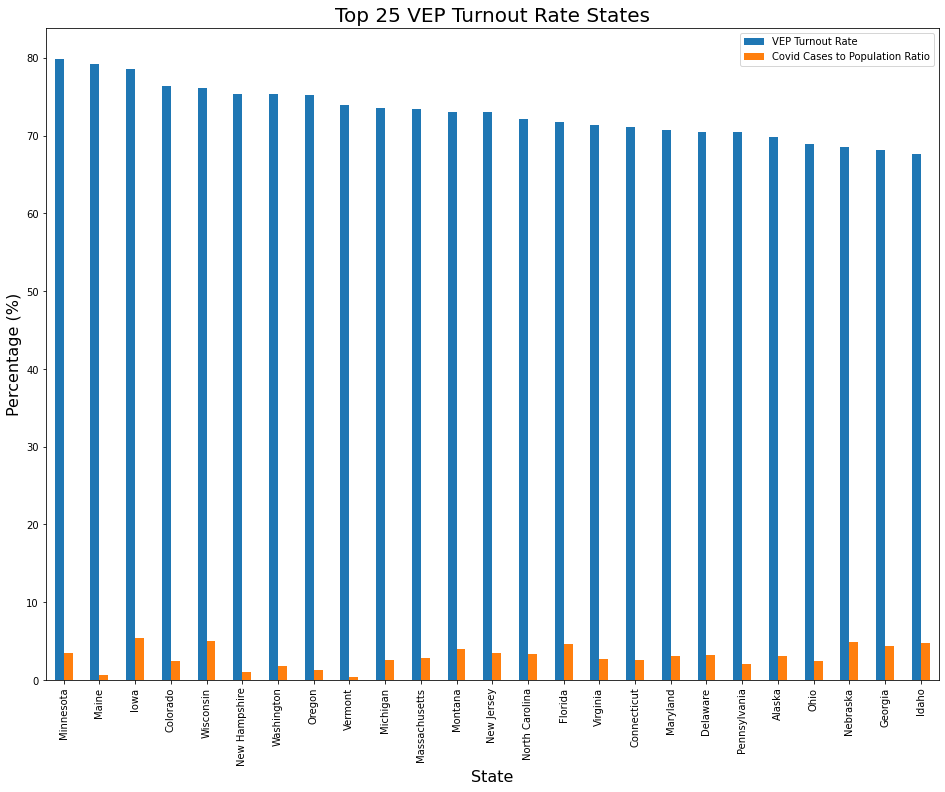

In [5]:
#code for data analyis/visualization
import matplotlib.pyplot as plt
import seaborn as sb
top10 = final_data.nlargest(25, 'VEP Turnout Rate')
bottom10 = final_data.nsmallest(25, 'VEP Turnout Rate')
top10.set_index('State', inplace = True)
top10[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Top 25 VEP Turnout Rate States', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Text(0, 0.5, 'Percentage (%)')

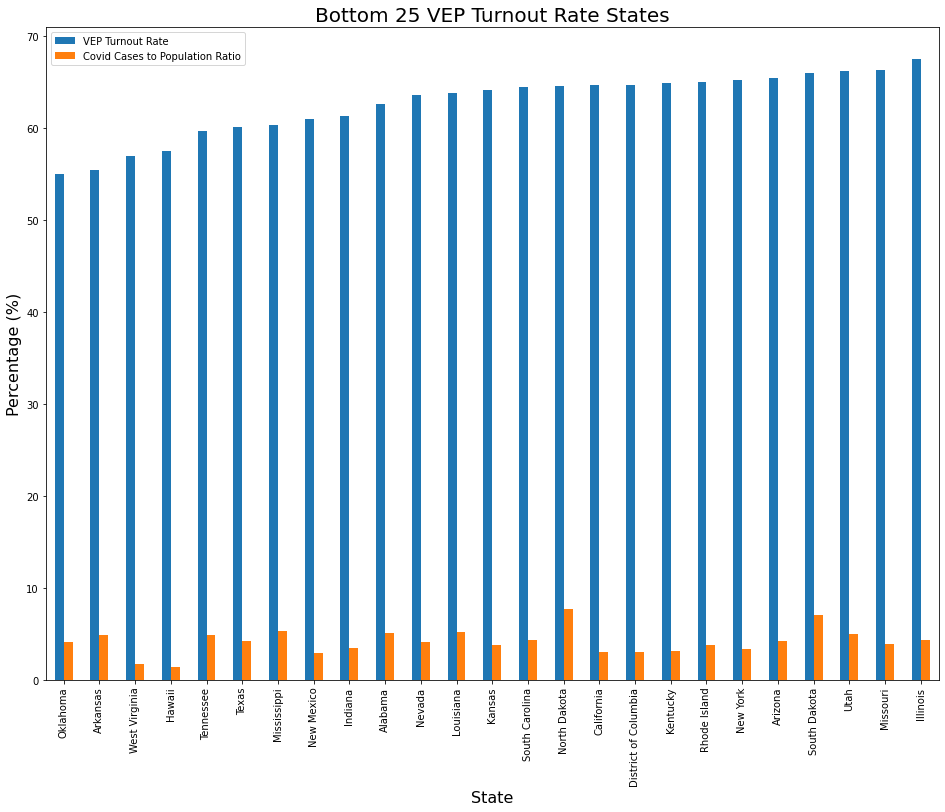

In [6]:
bottom10 = final_data.nsmallest(25, 'VEP Turnout Rate')
bottom10.set_index('State', inplace = True)
bottom10[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Bottom 25 VEP Turnout Rate States', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Another way of displaying the exact same data as above is using a scatter plot.  
The scatter plot below plots allows us to see a more clear relationship between VEP Turnout Rate (x-axis) and Covid Rate (y-axis).  From looking at the plot itself, it doesn't seem like VEP Turnout Rate and Covid Rate have a strong linear relationship.  However, after adding a trend line, we can see that there is a general downward trend, with the covid rate decreasing on average around 0.076% for each percent increase in VEP Turnout Rate. 

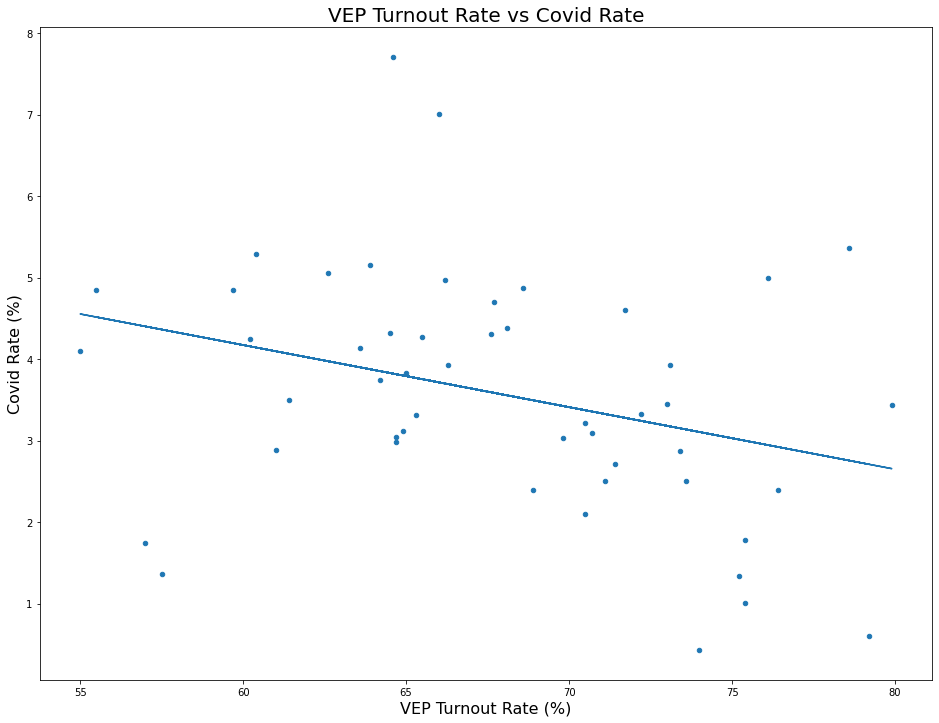

In [7]:
final_data.plot.scatter(x='VEP Turnout Rate', y='Covid Cases to Population Ratio', figsize=(16,12))
plt.xlabel('VEP Turnout Rate (%)', fontsize=16)
plt.ylabel('Covid Rate (%)', fontsize=16)
plt.title('VEP Turnout Rate vs Covid Rate', fontsize=20)
r, intercept = np.polyfit(final_data['VEP Turnout Rate'], final_data['Covid Cases to Population Ratio'], 1)
plt.plot(final_data['VEP Turnout Rate'], r*final_data['VEP Turnout Rate'] + intercept)

Slope of Regression Line: -0.07621091028055611

Another way we can analyze the data is by comparatively graphing votes for states based on how their populations have been affected by Covid. By grouping the top 25 states with the worst covid rates into one object, we can perform further analysis on it. Below are the states with the highest coronavirus to population ratio versus who they voted for. From what we can see, it is fairly even between both candidates. We can see Biden with the edge in states with higher populations such as Florida, Georgia, and Illinois. However, Trump has the majority in most of the states with less populations such as North Dakota and South Dakota. Trump has the majority of the votes for 60% of the states with the highest coronavirus rates, while Biden, being the winner of the popular vote, has a hold on states with larger populations.

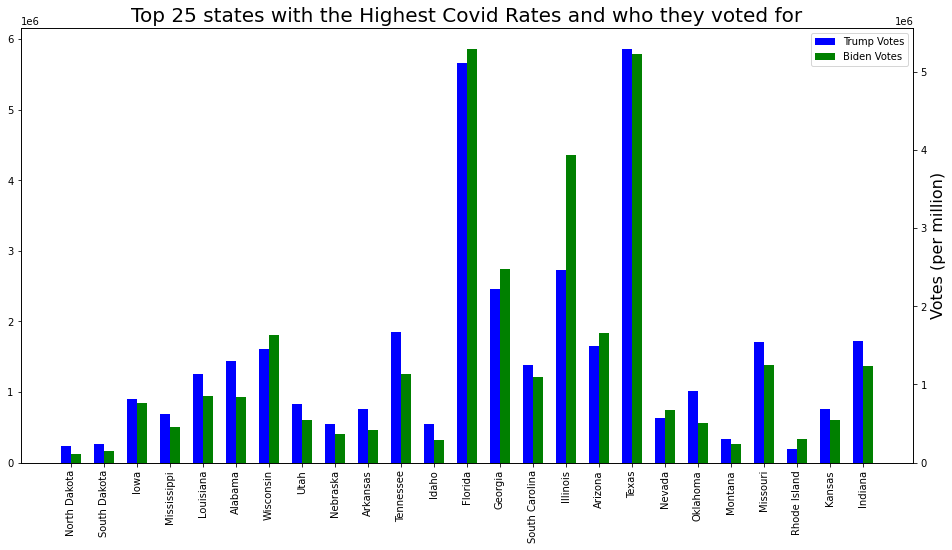

In [8]:
top25 = final_data.nlargest(25, 'Covid Cases to Population Ratio')

plt.figure(figsize=(16,8))
x = np.arange(25)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, top25['State'], rotation = 'vertical')
popper = ax1.bar(x, top25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,top25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.xlabel('States', fontsize = 16)
plt.ylabel('Votes (per million)', fontsize = 16)
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Top 25 states with the Highest Covid Rates and who they voted for', fontsize=20)
plt.show()

Now on the flipside from what we analyzed before this, we take a look on who the states with the least ratio of Covid cases to Population ratio and who they respectively voted for. However, it is important to distinguish some outliers in this case, since Hawaii and Alaska are not as affected from the Coronavirus as the other states, their ratio is obviously going to be very good as they haven't been nearly as affected by the spread of the virus as mainland states due to various geographic travel barriers. Looking at the other conglomerate of states, we can see that Trump usually leads overall, with the exception of California, which has historically been blue. 

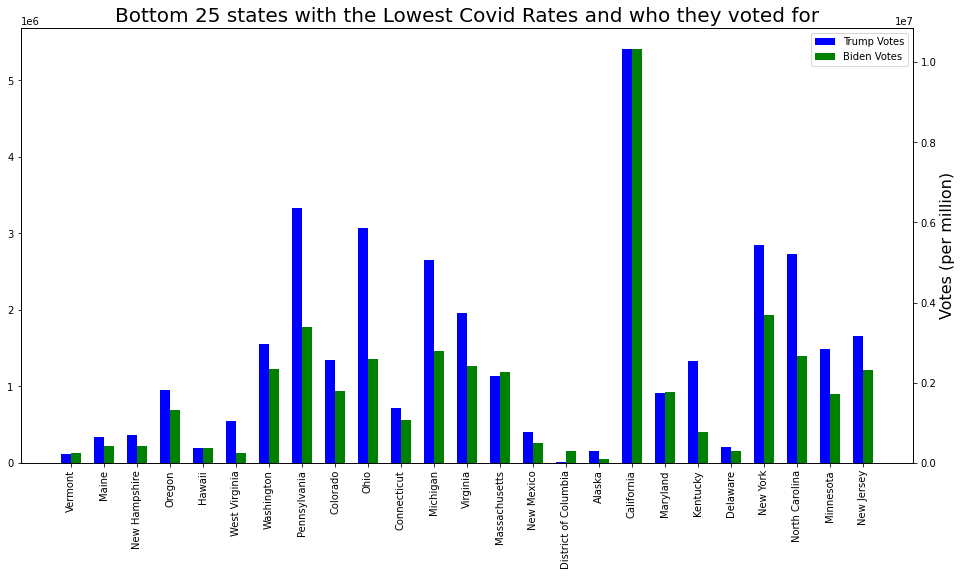

In [9]:
bottom25 = final_data.nsmallest(25, 'Covid Cases to Population Ratio')
plt.figure(figsize=(16,8))
x = np.arange(25)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, bottom25['State'], rotation = 'vertical')
popper = ax1.bar(x, bottom25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,bottom25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.ylabel('Votes (per million)', fontsize = 16)
plt.xlabel('States', fontsize = 16)
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Bottom 25 states with the Lowest Covid Rates and who they voted for', fontsize=20)
plt.show()

Moving onto another note, our data does not consider third party votes. It only considers Trump's and Biden's votes. Using a pie chart, we can see the actual split in the votes recorded by each county summed up. 

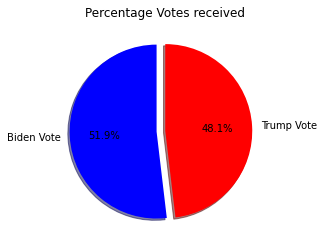

In [10]:
#result
biden_total = final_data['Biden Votes'].sum()
trump_total = final_data['Trump Votes'].sum()
total = biden_total + trump_total
slices = [biden_total,trump_total]
acts = ['Biden Vote','Trump Vote']
cols = ['b','r']
plt.pie(slices,labels=acts,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%',explode=(0.1,0))
plt.title('Percentage Votes received')
plt.show()

Taking a step back from the election, let's look at where Coronavirus really hurt the United States, in a regional sense, here we use the regional data that we included before to create a pie chart. This pie chart shows the distribution of the Coronavirus cases across the different geographical regions. We note that the Southeast has the highest percent and the Southwest has the lowest percent. What this means, in a numerical term, is that of all the cases counted up to November 1st, 32.9% of them came from the Southeastern states.

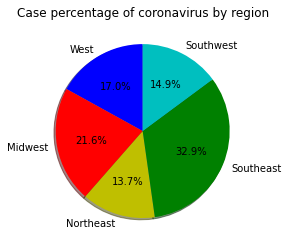

In [11]:
#regional
cases_w = west1['cases'].sum()
cases_ne = northeast1['cases'].sum()
cases_mw = midwest1['cases'].sum()
cases_se = southeast1['cases'].sum()
cases_sw = southwest1['cases'].sum()
total = cases_w + cases_ne + cases_se + cases_sw
slices = [cases_w,cases_mw,cases_ne,cases_se,cases_sw]
acts = ['West','Midwest','Northeast','Southeast','Southwest']
cols = ['b','r','y','g','c']
plt.pie(slices,labels=acts,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%')
plt.title('Case percentage of coronavirus by region')
plt.show()

Lets take a closer look at the Southwestern region. Here we graph the VEP rate of each of the Southwestern countries versus their covid ratio. The Southwest consists of the states near or bordering Mexico, so with travel restricted and strict social distancing laws, we see low rates of coronavirus. The VEP % was in the range of ~55-60, with also very low covid ratios. Here we can see that New Mexico and Arizona had slightly lower rates of coronavirus, and thus, their VEP rates were slightly higher.

Text(0, 0.5, 'Percentage (%)')

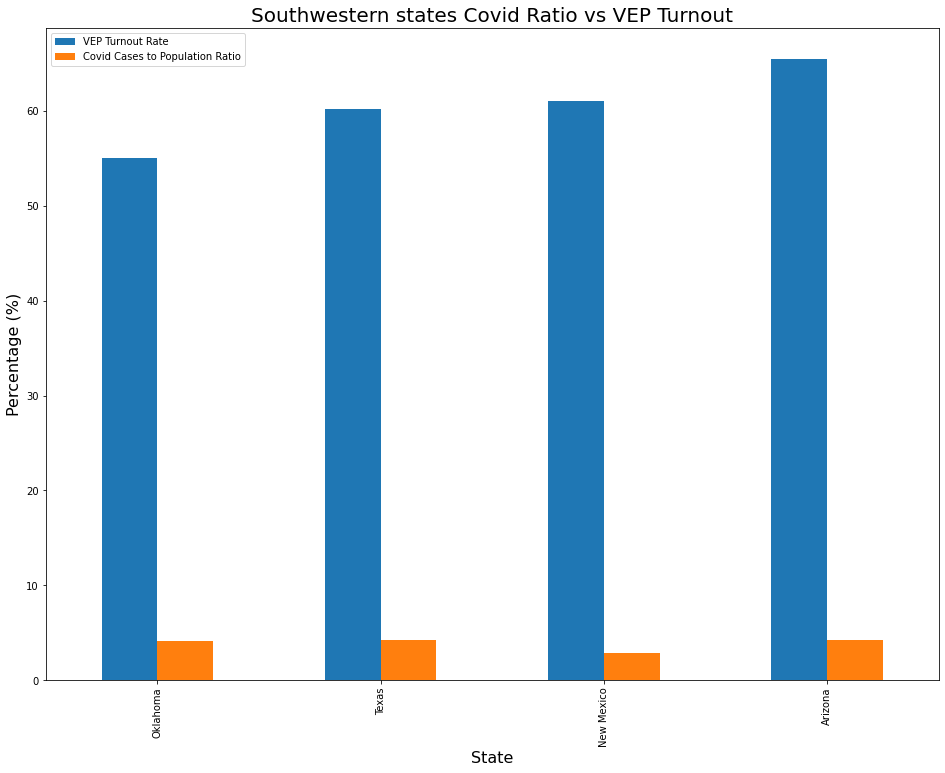

In [12]:
#looking at southwest and southeast
sw = southwest1.nsmallest(25, 'VEP Turnout Rate')
sw.set_index('State', inplace = True)
sw[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Southwestern states Covid Ratio vs VEP Turnout', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Now we move on to look at the region with the most cases of coronavirus, which is the Southeastern region. Since there is a multitude of states in this region, it is apparent as to why they would have high coronavirus rates. However, most of these states don't come close to the populations of New York or California, so we can observe that since there are many states of not record-holding populations, they all consist of high rates compared to the rest of the country. Here we can see something a bit different from the Southwest region, here VEP % ranged from 55-about 70, so we can see that there is a bit of an increase of turnout rate compared to the Southwest. 

Text(0, 0.5, 'Percentage (%)')

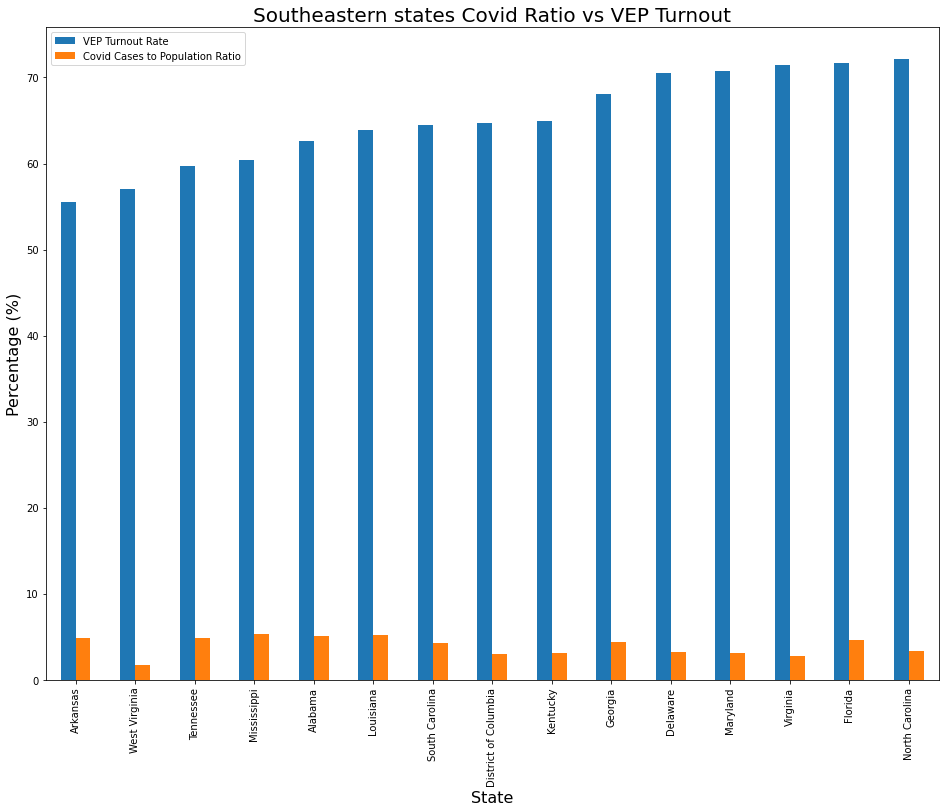

In [13]:
se = southeast1.nsmallest(25, 'VEP Turnout Rate')
se.set_index('State', inplace = True)
se[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Southeastern states Covid Ratio vs VEP Turnout', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Now we can take a look at how citizens and non-citizens voted. Below are both the graphs analyzing the data for the top and bottom 10 states with the highest ratio of non-citizens. Looking at the top 10 states with the highest % of non-citizens, we can see that majority of the states voted for Trump. States such as Texas and Arizona are right next to the border, so they would have a higher number of non-citizens. The Great American Rust belt has always been red throughout our history so that's no suprise. We can see after analyzing the graph, that many of the states that had a higher % of non-citizens voted for Trump.

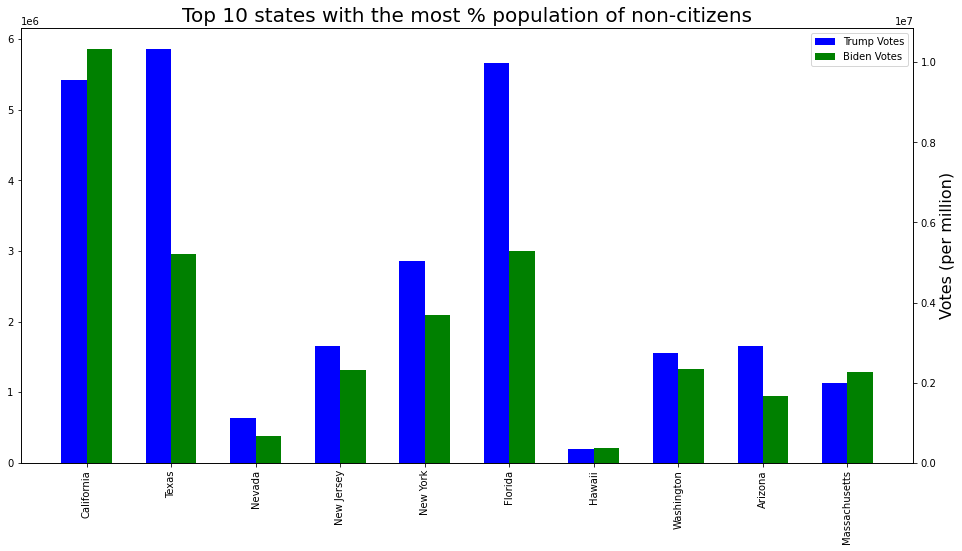

In [14]:
bottom25 = final_data.nlargest(10, '% Non-citizen')
plt.figure(figsize=(16,8))
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, bottom25['State'], rotation = 'vertical')
popper = ax1.bar(x, bottom25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,bottom25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.ylabel('Votes (per million)', fontsize = 16)
plt.xlabel('States', fontsize = 16)
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Top 10 states with the most % population of non-citizens', fontsize=20)
plt.show()

Now we take a look at how the states with the least % of non-citizens voted. Most of these states are in the midwest, and have historically been red. Also since immigration is usually most concentrated towards the coastlines and borders, it would be obvious to see that a state such as South Dakota has one of the lowest % population of non-citizens. Here we can still see that most of the states had a Trump majority, discounting a few.

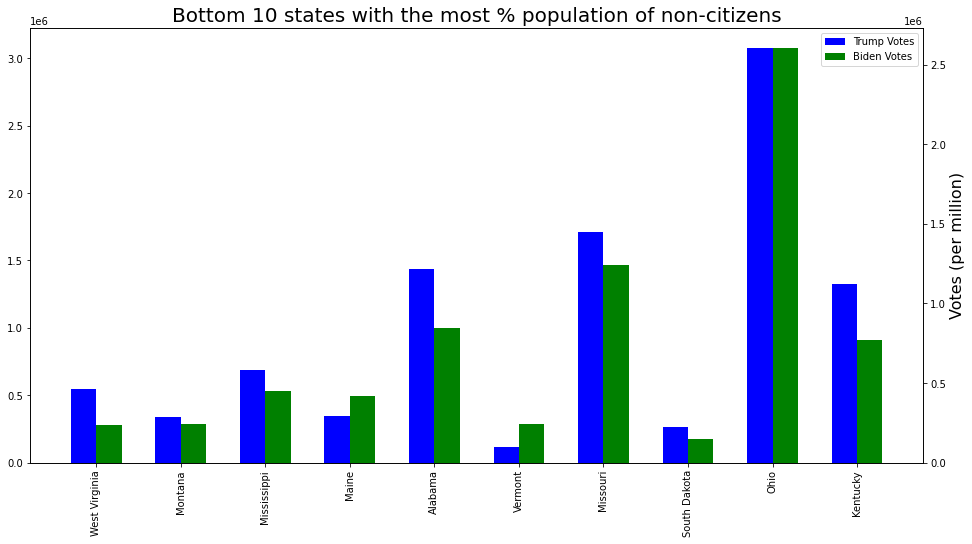

In [15]:
bottom25 = final_data.nsmallest(10, '% Non-citizen')
plt.figure(figsize=(16,8))
x = np.arange(10)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, bottom25['State'], rotation = 'vertical')
popper = ax1.bar(x, bottom25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,bottom25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.ylabel('Votes (per million)', fontsize = 16)
plt.xlabel('States', fontsize = 16)
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Bottom 10 states with the most % population of non-citizens', fontsize=20)
plt.show()

<br><br><br><br>
<center><div style="font-size: 30px"> <b>Hypothesis Testing</b> </center>

The last step of analyzing data is hypothesis testing.  This is where we make conclusions about any type of relationships we've oberved through our visualizations.  There are 2 outcomes for a hypothesis test: we either reject the null hypothesis, or fail to reject the null hypothesis.  We will perform the linear regression test using the statsmodels.api libary and output the results with its summary function.  This will tell us the t-value and p-value of the test, which tells us the probability that we obtained the results purely by chance.  We will also use the significance level of 0.05, which means we reject the null hypothesis if the p-value is less than 0.05.  

We will test several hypotheses in this section, namely the impact of Covid on the election, as well as who each state voted for and its impact on voter turnout rates. We test two hypotheses regarding the impact of Covid, namely how Covid Cases to Population Ratio affect voter turnout rates, and how the three factors of Covid Deaths, Covid Cases to Population Ratio, and Covid Cases affect voter turnout rates. We also test how voter turnout rates were affected by the amount of Trump and Biden votes in each state.  Below are the hypothesis for the 3 tests we will conduct.

Hypotheses for linear regression tests:

Covid rate vs voter turnout rate: 
    Null: In a given state, there is no relationship between covid rate and VEP Turnout rate
    Alternative: In a given state, there is a relationship between covid rate and VEP Turnout rate

Trump Votes vs Non-Citizen: 
    Null: In a given state, there is no relationship between the number of Trump votes and the perentage of non-citizens 
    Alternative: In a given state, there is relationship between the number of Trump votes and the perentage of non-citizens

Biden Votes vs Non-Citizen:
    Null: In a given state, there is no relationship between the number of Biden votes and the perentage of non-citizens 
    Alternative: In a given state, there is relationship between the number of Biden votes and the perentage of non-citizens

This test was purely on relation of Covid Cases (to Population Ratio) to voter turnout rate. With an R-squared of 0.82, a strong correlation exists between Covid cases and voter turnout rate.  The linear regression t-test produced a t-value of 15.438, which matches with an incredibly small p-value of around 0.00.  At a significance level of .05, we confidently reject the null hypothesis and conclude that there seems to be a relationship between the covid rate of a state and its VEP Turnout rate in the 2020 election.  

In [16]:
import statsmodels.api as sm 
arg = pd.DataFrame(final_data,columns = ['Covid Cases to Population Ratio'])
targ = pd.DataFrame(final_data,columns = ['VEP Turnout Rate'])

x = arg['Covid Cases to Population Ratio']
y = targ['VEP Turnout Rate']

model = sm.OLS(y, x).fit()
preds = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       VEP Turnout Rate   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              238.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    1.88e-20
Time:                        21:48:15   Log-Likelihood:                         -237.79
No. Observations:                  50   AIC:                                      477.6
Df Residuals:                      49   BIC:                                      479.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Covid Cases to Population Ratio    16.0596      1.040     15.438      0.000      13.969      18.150
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.135
Skew:                           0.001   Prob(JB):                        0.935
Kurtosis:                       3.255   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This test was purely on relationship between the number of Trump votes in a state and the percentage of non-citizens in a given state. With an R-squared of 0.625, a moderate correlation exists between the 2 variables.  The linear regression t-test produced a t-value of 9.442, which again matches with an incredibly small p-value rounded to 0.00.  At a significance level of .05, we confidently reject the null hypothesis and conclude that there seems to be a relationship between the number of Trump votes of a state and its percentate of non-citizens.  

In [17]:
arg1 = pd.DataFrame(final_data,columns = ['% Non-citizen'])
targ1 = pd.DataFrame(final_data)

x = targ1[['Trump Votes']]
y = arg1['% Non-citizen']

model = sm.OLS(y, x).fit()
preds = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          % Non-citizen   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              89.15
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    1.31e-12
Time:                        21:48:15   Log-Likelihood:                         -137.68
No. Observations:                  50   AIC:                                      277.4
Df Residuals:                      49   BIC:                                      279.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Trump Votes  2.579e-06   2.73e-07      9.442      0.000    2.03e-06    3.13e-06
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.207
Skew:                           0.115   Prob(JB):                        0.902
Kurtosis:                       2.785   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This test was purely on relationship between the number of Biden votes in a state and the percentage of non-citizens in a given state. With an R-squared of 0.666, a moderate correlation exists between the 2 variables.  The linear regression t-test produced a t-value of 9.875, which again matches with an incredibly small p-value rounded to 0.00.  At a significance level of .05, we confidently reject the null hypothesis and conclude that there seems to be a relationship between the number of Biden votes of a state and its percentate of non-citizens.  

In [18]:
arg1 = pd.DataFrame(final_data,columns = ['% Non-citizen'])
targ1 = pd.DataFrame(final_data)

x = targ1[['Biden Votes']]
y = arg1['% Non-citizen']

model = sm.OLS(y, x).fit()
preds = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          % Non-citizen   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                              97.52
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    3.05e-13
Time:                        21:48:15   Log-Likelihood:                         -136.21
No. Observations:                  50   AIC:                                      274.4
Df Residuals:                      49   BIC:                                      276.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Biden Votes  2.194e-06   2.22e-07      9.875      0.000    1.75e-06    2.64e-06
==============================================================================
Omnibus:                        4.677   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.690
Skew:                          -0.268   Prob(JB):                       0.0959
Kurtosis:                       4.401   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br><br><br><br>
<center><div style="font-size: 30px"> <b>Analysis</b> </center>

In conclusion, the data of the 2020 U.S. Presidential Election presents many conclusions that can let us learn important information about what happened. We presented a viable data pipeline from collection to hypothesis testing that let us conclusively analyze data at each step of the process. Hopefully, you were able to get a good visualization of various aspects of the data and learn more about the election, and who voted for whom. We learned several valuable insights, such as our main hypothesis that Covid rates affected voting rates. We learned that higher Covid rates led to lower voter turnout rates, and that states with Biden votes were states with higher non-citizen percentages. Conversely, states with higher Trump votes were states with lower non-citizen percentages.

While our report was a landmark start into a proper analysis of the 2020 U.S. Presidential Election, there exist several more avenues of analysis to be done. Our analysis consisted mostly of utilizing state-based data (such as top/bottom 25 states) rather than population densities or specifical political affiliations. While Covid was also a major limiting factor in voting turnout rates, measures existed to counteract this, namely mail-in and absentee ballots. Our analysis did not cover these, and much remains to be explored regarding these avenues. The 2020 U.S. Presidential Election was a key event in our modern society, and thus deserves more research into its analysis.